In [30]:
import pandas as pd
import numpy as np
df=pd.read_csv("C://Users//hp//Desktop//ML Project Pipe//pipe1.csv")
df

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,3,0.4217,2,1,0.6131,0.9991,1
1,6,0.7629,4,-2,0.3846,0.9982,1
2,5,0.1898,1,-7,0.6917,0.9982,1
3,2,0.4062,2,-2,0.5927,0.9980,1
4,6,0.8078,4,-10,0.9345,0.9980,1
...,...,...,...,...,...,...,...
1936,4,0.7451,3,-11,0.8008,0.0258,1
1937,4,0.4697,2,-4,0.1728,0.0257,1
1938,3,0.0448,1,-2,0.5649,0.0254,0
1939,1,0.7149,3,9,0.2688,0.0253,1


In [31]:
df.describe

<bound method NDFrame.describe of       material    tomr  cf  c_wave_no  cd_radial  cw_circumferencial  crack
0            3  0.4217   2          1     0.6131              0.9991      1
1            6  0.7629   4         -2     0.3846              0.9982      1
2            5  0.1898   1         -7     0.6917              0.9982      1
3            2  0.4062   2         -2     0.5927              0.9980      1
4            6  0.8078   4        -10     0.9345              0.9980      1
...        ...     ...  ..        ...        ...                 ...    ...
1936         4  0.7451   3        -11     0.8008              0.0258      1
1937         4  0.4697   2         -4     0.1728              0.0257      1
1938         3  0.0448   1         -2     0.5649              0.0254      0
1939         1  0.7149   3          9     0.2688              0.0253      1
1940         4  0.7759   4          7     0.9258              0.0252      1

[1941 rows x 7 columns]>

In [32]:
df.shape


(1941, 7)

In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [34]:
data = pd.read_csv('C://Users//hp//Desktop//ML Project Pipe//pipe.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1941, 7)
['material', 'tomr', 'cf', 'c_wave_no', 'cd_radial', 'cw_circumferencial', 'crack']


In [35]:
data.head()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,2,0.8488,2,3,0.6106,0.2070,1
1,4,0.8316,1,-8,0.8701,0.6067,0
2,4,0.1553,1,6,0.3701,0.1110,1
3,5,0.9015,4,-2,0.2415,0.6505,1
4,5,0.2654,2,6,0.8359,0.8717,0


In [36]:
data['tomr'].unique()

array([0.8488, 0.8316, 0.1553, ..., 0.8303, 0.863 , 0.9146])

In [37]:
data['c_wave_no'].unique()

array([  3,  -8,   6,  -2, -10,   9,   5,  -3,  10,  -9,   7,  -4,  -5,
        -7,   2,  -6,  -1, -11,  11,   8,   0,   1,   4], dtype=int64)

In [38]:
data['cd_radial'].unique()

array([0.6106, 0.8701, 0.3701, ..., 0.714 , 0.0931, 0.9466])

In [39]:
data['cw_circumferencial'].unique()

array([0.207 , 0.6067, 0.111 , ..., 0.8553, 0.5016, 0.0801])

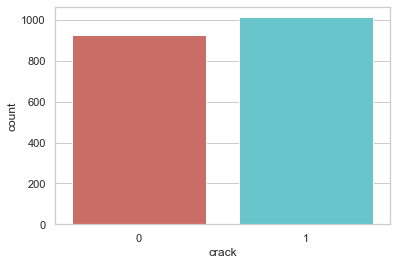

<Figure size 432x288 with 0 Axes>

In [40]:
data['crack'].value_counts()
sns.countplot(x='crack',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [41]:
data.groupby('crack').mean()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial
crack,,,,,,
0,3.561422,0.506541,2.553879,-0.191810,0.506990,0.510127
1,3.441264,0.519742,2.470879,-0.234946,0.508227,0.500778


In [42]:
# drop features
X=data.drop(['crack'],axis=1)
y=data['crack']

In [43]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691237
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  crack   No. Observations:                 1941
Model:                          Logit   Df Residuals:                     1935
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                0.001374
Time:                        11:42:53   Log-Likelihood:                -1341.7
converged:                       True   LL-Null:                       -1343.5
Covariance Type:            nonrobust   LLR p-value:                    0.5944
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
material              -0.0183      0.023     -0.788      0.431      -0.064       0.027
tomr 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.535


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38       276
           1       0.51      0.63      0.56       307

    accuracy                           0.49       583
   macro avg       0.48      0.48      0.47       583
weighted avg       0.48      0.49      0.48       583



In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import matplotlib.pyplot as plt

sns.set()

In [50]:
import pandas as pd
import numpy as np
df1=pd.read_csv("C://Users//hp//Desktop//ML Project Pipe//pipe.csv")
df1

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,2,0.8488,2,3,0.6106,0.2070,1
1,4,0.8316,1,-8,0.8701,0.6067,0
2,4,0.1553,1,6,0.3701,0.1110,1
3,5,0.9015,4,-2,0.2415,0.6505,1
4,5,0.2654,2,6,0.8359,0.8717,0
...,...,...,...,...,...,...,...
1936,1,0.8581,3,-6,0.1556,0.2723,0
1937,2,0.7158,4,-5,0.7140,0.9152,0
1938,5,0.8303,3,-10,0.0931,0.8553,1
1939,3,0.8630,3,-6,0.9466,0.5016,0


In [51]:
n=df.isnull().sum()
print(n)
df=df.dropna()

material              0
tomr                  0
cf                    0
c_wave_no             0
cd_radial             0
cw_circumferencial    0
crack                 0
dtype: int64


<AxesSubplot:xlabel='crack', ylabel='count'>

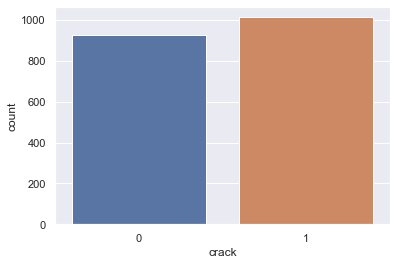

In [52]:
sns.countplot(x='crack', data=df1)

In [53]:
# drop features
X=data.drop(['crack'],axis=1)
y=data['crack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
lr = LogisticRegression(C=1,max_iter=100)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(f"Accuracy: ", accuracy_score(y_pred1, y_test)*100,'%')
print(classification_report(y_test, y_pred1))

Accuracy:  48.713550600343055 %
              precision    recall  f1-score   support

           0       0.44      0.33      0.38       276
           1       0.51      0.63      0.56       307

    accuracy                           0.49       583
   macro avg       0.48      0.48      0.47       583
weighted avg       0.48      0.49      0.48       583

